In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import scipy.fft as fft
import scipy as sp
import asp_func as f

### Problem 1

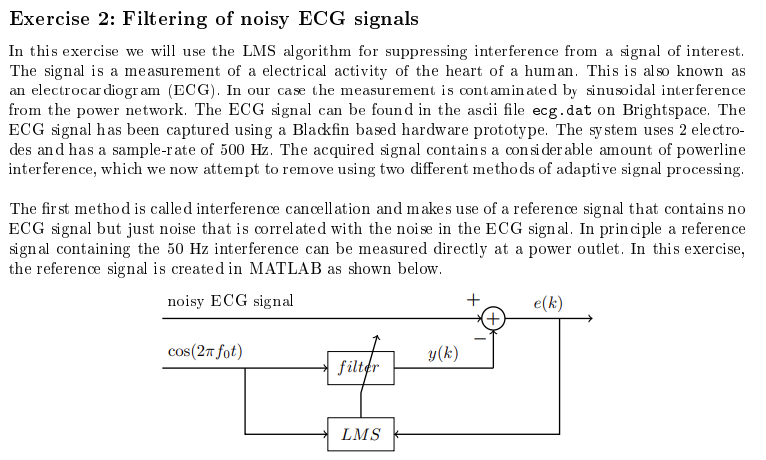

#### 1)
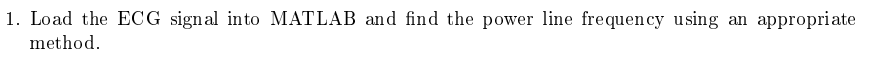

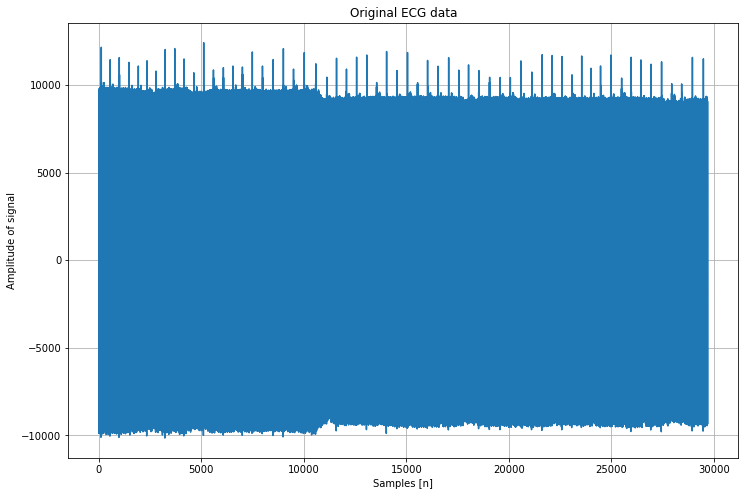

In [2]:
data = np.loadtxt("ecg.dat") # Desired signal
N = len(data)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(data)
ax.set_title("Original ECG data")
ax.set_xlabel("Samples [n]")
ax.set_ylabel("Amplitude of signal")
ax.grid()
plt.show()

#### 2)
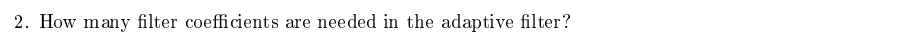

In [3]:
Nc = 5 #Number of filter taps in adaptive filter 

#### 3)
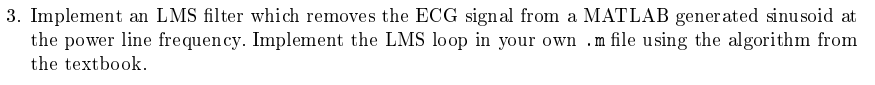

In [4]:
def LMS(x, d, order, step): #Takes data sequence (x), desired signal (d), number of filter taps (order), step-size (step)
    N = len(x)
    ws = np.zeros((N, order))
    ys = np.zeros(N)
    error = np.zeros(N)
    w = np.zeros(order)
    x_in = np.zeros(order)
    for k in range(N):
        ws[k] = w
        x_in = np.insert(x_in, 0, x[k])
        x_in = np.delete(x_in, -1)
        ys[k] = np.dot(w, x_in)
        error[k] = d[k] - ys[k]
        w = w + 2*step*error[k]*x_in
    return ws, ys, error

#### 4)
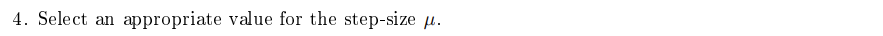

In [5]:
f0 = 50 #Powerline noise frequency
fs = 500 #Sampling frequency of system
Tsig = N/fs #Time-span of sampled signal

t = np.arange(0, Tsig, 1/fs)
xk = np.cos(2*np.pi*f0*t)

#Autocorrelation matrix constructed
ACR, lags = f.autocorrelation(xk, Nc)
R = sp.linalg.toeplitz(np.flip(ACR[:Nc]))

#Maximum step-size determined from the trace of the autocorrelation matrix
μ_max = 1/(3*np.trace(R))
μ_max

0.16481461279335405

#### 5)
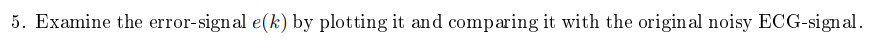

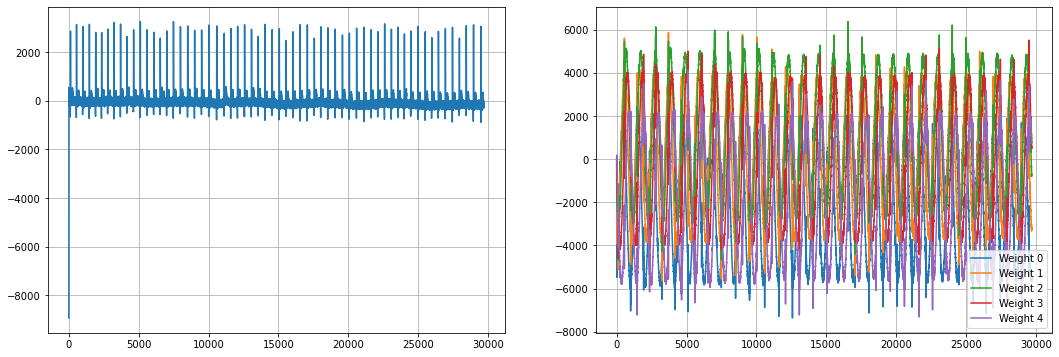

In [6]:
#Determined optimum weights with LMS
ws, ys, err = LMS(xk, data, Nc, μ_max)

#From the plot below, we can see that we have strong oscillations in the weights over iterations. 
#It could indicate that 50 Hz is not being found. 
fig, ax = plt.subplots(1,2, figsize=(18,6))
ax[0].plot(err)
ax[0].grid()
for w in range(Nc):
    ax[1].plot(ws[:,w], label=f"Weight {w}")
ax[1].legend()
ax[1].grid()
plt.show()

Frequency of maximum energy: 49.52695195447965


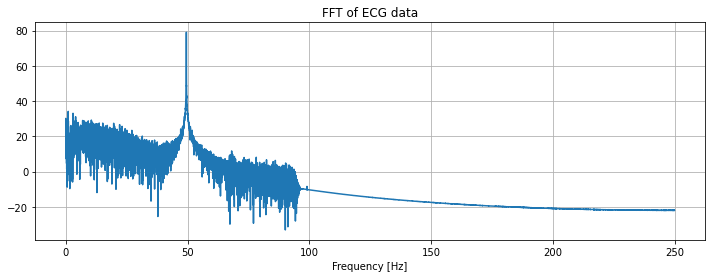

In [7]:
data_fft = fft.fft(data)
fft_freq = fft.fftfreq(N, 1/fs)[:N//2]
fft_db = 20*np.log10(2.0/N * abs(data_fft[0:N//2]))

idx_max = np.argmax(fft_db)
freq_max = fft_freq[idx_max]
print("Frequency of maximum energy:",freq_max)

fig, ax = plt.subplots(figsize=(12,4))
ax.plot(fft_freq, fft_db)
ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("")
ax.set_title("FFT of ECG data")
ax.grid()
plt.show()

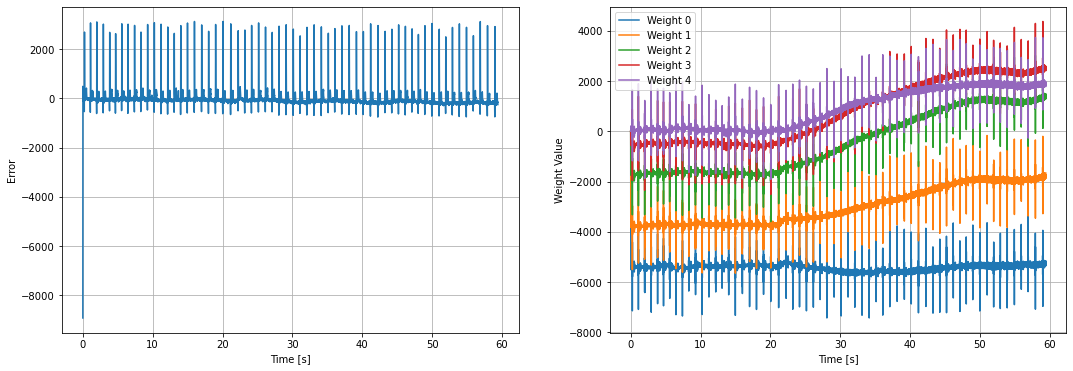

In [8]:
f0 = freq_max #Powerline noise frequency
fs = 500 #Sampling frequency of system
Tsig = N/fs #Time-span of sampled signal

t = np.arange(0, Tsig, 1/fs)
xk = np.cos(2*np.pi*f0*t)
μ = μ_max

ws, ys, err = LMS(xk, data, Nc, μ_max)

fig, ax = plt.subplots(1,2, figsize=(18,6))
ax[0].plot(t,err)
ax[0].set_xlabel("Time [s]")
ax[0].set_ylabel("Error")
ax[0].grid()
for w in range(Nc):
    ax[1].plot(t,ws[:,w], label=f"Weight {w}")
ax[1].set_xlabel("Time [s]")
ax[1].set_ylabel("Weight Value")
ax[1].legend()
ax[1].grid()
plt.show()

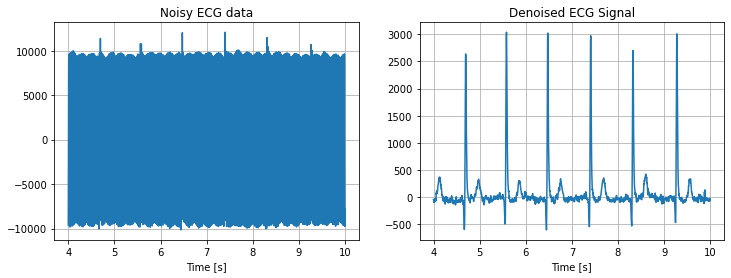

In [9]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(t[2000:5000], data[2000:5000])
ax[0].set_title("Noisy ECG data")
ax[0].set_xlabel("Time [s]")
ax[0].grid()
ax[1].plot(t[2000:5000], err[2000:5000])
ax[1].set_title("Denoised ECG Signal")
ax[1].set_xlabel("Time [s]")
ax[1].grid()
plt.show()

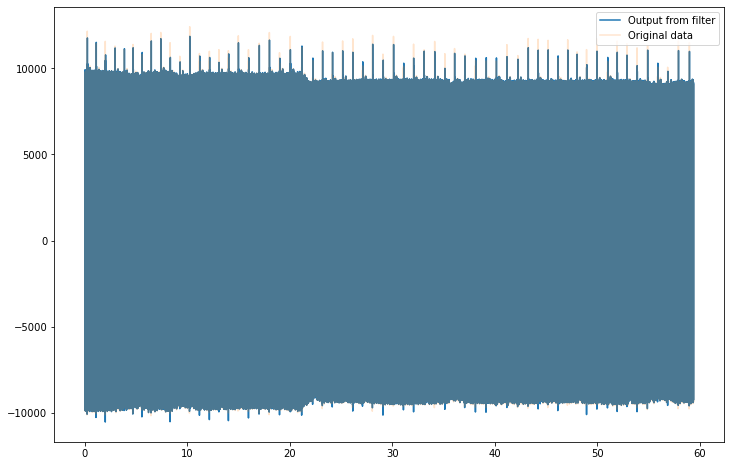

In [10]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(t,-ys, label="Output from filter")
ax.plot(t, data, label="Original data",alpha=0.2)
ax.legend()
plt.show()

It would seem that after approximately 20 seconds, the signal somehow changes character and the filter starts adapting again. 

From the FFT below, it can be seen that the dominant frequency changes a tiny bit. However, the filter adopts to the change. 

Frequency of maximum energy: 49.550000000000004


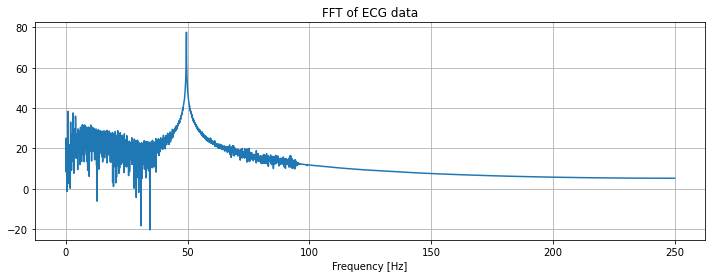

In [11]:
N_20sec = 500*20
data_fft = fft.fft(data[N_20sec:2*N_20sec])
fft_freq = fft.fftfreq(N_20sec, 1/fs)[:N_20sec//2]
fft_db = 20*np.log10(2.0/N_20sec * abs(data_fft[0:N_20sec//2]))

idx_max = np.argmax(fft_db)
freq_max2 = fft_freq[idx_max]
print("Frequency of maximum energy:",freq_max2)

fig, ax = plt.subplots(figsize=(12,4))
ax.plot(fft_freq, fft_db)
ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("")
ax.set_title("FFT of ECG data")
ax.grid()
plt.show()

#### 7)
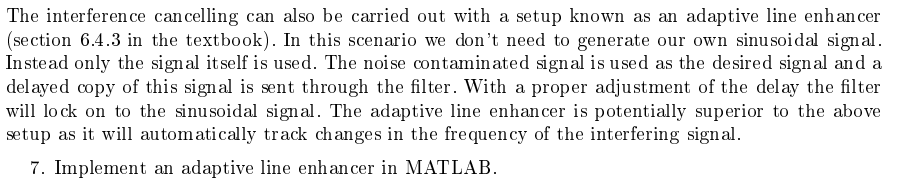

In [38]:
delay = 2
des = np.append(data, [0]*delay) #Desired Signal
des_delay = np.insert(data, 0, [0]*delay) #Input signal
Nc = 2

#Autocorrelation matrix constructed
ACR, lags = f.autocorrelation(des_delay, Nc)
R = sp.linalg.toeplitz(np.flip(ACR[:Nc]))

#Maximum step-size determined from the trace of the autocorrelation matrix
μ_max = 1/(3*np.trace(R))
μ_li = μ_max
μ_li

4.5340350104699375e-09

In [39]:
ws_li, ys_li, err_li = LMS(des_delay, des, Nc, μ_li)

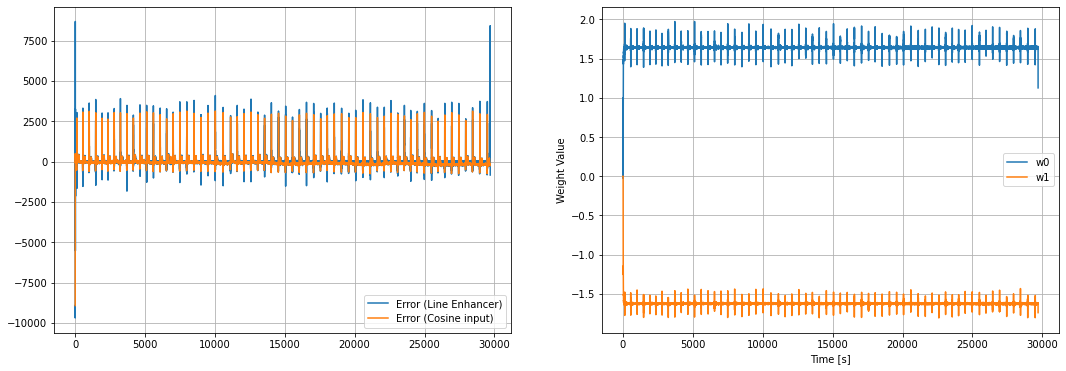

In [40]:
fig, ax = plt.subplots(1,2,figsize=(18,6))
ax[0].plot(err_li, label="Error (Line Enhancer)")
ax[0].plot(err, label="Error (Cosine input)")
ax[0].grid()
ax[0].legend()
for w in range(Nc):
    ax[1].plot(ws_li[:,w], label=f"w{w}")
ax[1].set_xlabel("Time [s]")
ax[1].set_ylabel("Weight Value")
ax[1].legend()
ax[1].grid()

#### 10)
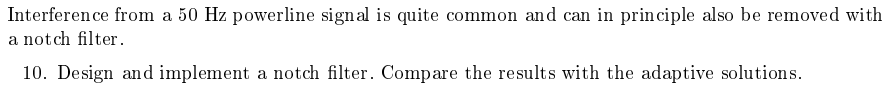

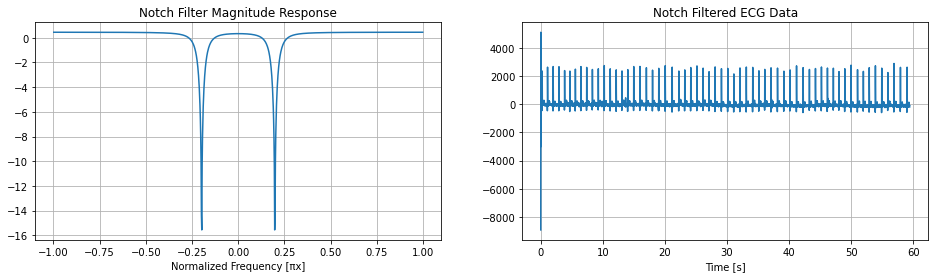

In [41]:
b0 = 1
Φ = (freq_max / 250)*np.pi #50/250π
r = 0.9
num_notch = np.array([1, -2*np.cos(Φ), 1]) * b0
den_notch = np.array([1, -2*r*np.cos(Φ), r**2])

ECG_notch = sig.lfilter(num_notch, den_notch, data)

fig, ax = plt.subplots(1,2,figsize=(16,4))
f.plotMagResponse(num_notch, den_notch, db=True, ax=ax[0])
ax[0].grid()
ax[0].set_title("Notch Filter Magnitude Response")
ax[0].set_xlabel("Normalized Frequency [πx]")
ax[1].plot(t,ECG_notch)
ax[1].set_title("Notch Filtered ECG Data")
ax[1].set_xlabel("Time [s]")
ax[1].grid()
plt.show()

Frequency of maximum energy: 1.0100670011110737


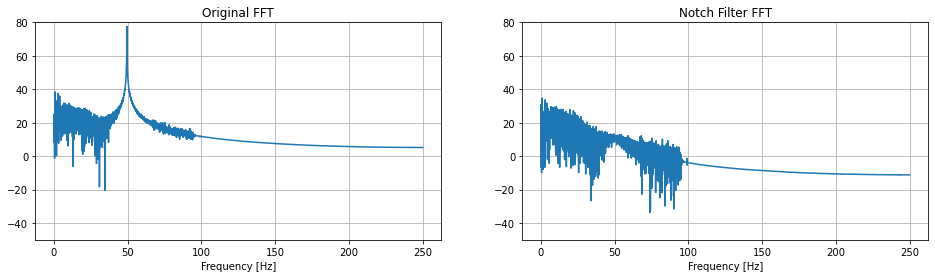

In [42]:
notch_fft = fft.fft(ECG_notch)
notch_freq = fft.fftfreq(N, 1/fs)[:N//2]
notch_db = 20*np.log10(2.0/N * abs(notch_fft[0:N//2]))

idx_max = np.argmax(notch_db)
notch_max = notch_freq[idx_max]
print("Frequency of maximum energy:",notch_max)

fig, ax = plt.subplots(1,2,figsize=(16,4))
ax[0].plot(fft_freq, fft_db)
ax[0].set_ylim(-50,80)
ax[0].set_xlabel("Frequency [Hz]")
ax[0].set_title("Original FFT")
ax[0].grid()

ax[1].plot(notch_freq, notch_db)
ax[1].set_xlabel("Frequency [Hz]")
ax[1].set_ylim(-50,80)
ax[1].grid()
ax[1].set_title("Notch Filter FFT")
plt.show()

#### 11)
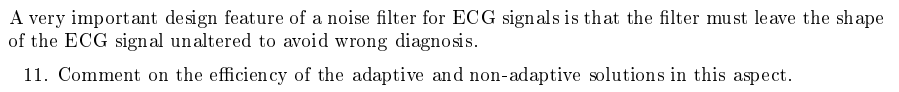

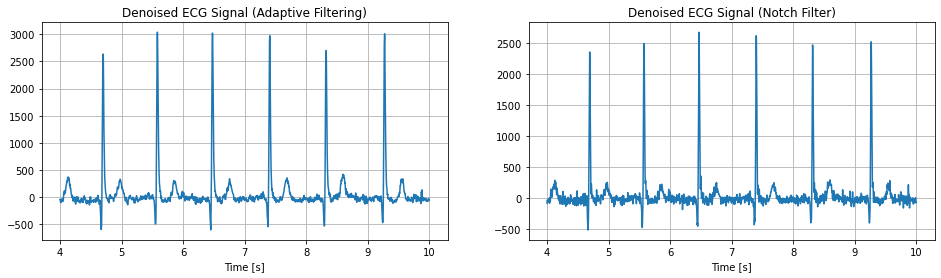

In [44]:
fig, ax = plt.subplots(1,2,figsize=(16,4))
ax[0].plot(t[2000:5000], err[2000:5000])
ax[0].set_title("Denoised ECG Signal (Adaptive Filtering)")
ax[0].set_xlabel("Time [s]")
ax[0].grid()
ax[1].plot(t[2000:5000], ECG_notch[2000:5000])
ax[1].set_title("Denoised ECG Signal (Notch Filter)")
ax[1].set_xlabel("Time [s]")
ax[1].grid()